<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame: 表格    Series: 一行/一列   (.apply 差異)
df = pd.DataFrame(iris["data"],
      columns=iris["feature_names"])
# df["ans"] = -1 全部欄位變-1
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.drop(["ans"], axis=1) #原表格不會被破壞, 詳細可以查 DataFrame.Drop()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# sklearn前:用pandas.DataFrame (split後會空行列之類的)
# sklearn後:用np.array
import numpy as np
from sklearn.model_selection import train_test_split
# x,y =df.drop(["ans"], axis=1), df["ans"] #上面的意思
x,y =np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])

# 90%x, 10%x, 90%y, 10%y
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size=0.1) # 如果加 random_state 會產生隨機固定結果
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
y_test

(135, 4)
(15, 4)
(135,)
(15,)


array([0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 498.3, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]\nclass = virginica'),
 Text(236.07692307692307, 407.70000000000005, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(321.9230769230769, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 91\nvalue = [0, 44, 47]\nclass = virginica'),
 Text(171.69230769230768, 317.1, 'petal length (cm) <= 4.95\ngini = 0.187\nsamples = 48\nvalue = [0, 43, 5]\nclass = versicolor'),
 Text(85.84615384615384, 226.5, 'petal width (cm) <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(42.92307692307692, 135.89999999999998, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = versicolor'),
 Text(128.76923076923077, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(257.53846153846155, 226.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(214.6153

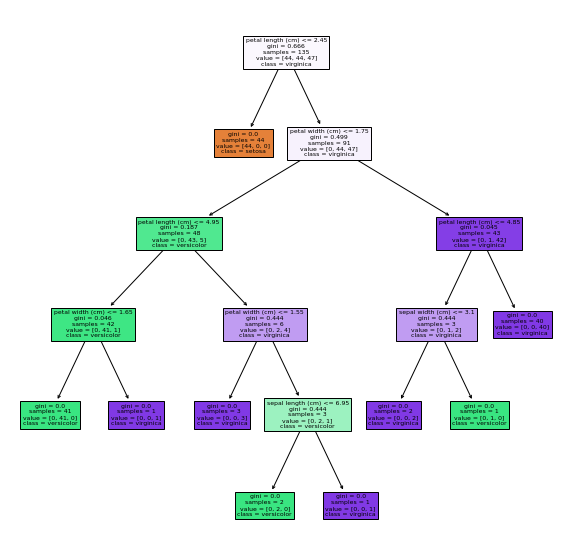

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)

In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

1.0